# problem statement : logistic regression

In [ ]:
Assignment -Logistic regression
Using ML model predict whether a person has diabetes or not, based on
information about the patient such as blood pressure, body mass index (BMI),
age, etc.
Data Dictionary : column name : column description
• Pregnancies: Number of times pregnant
• Glucose: Plasma glucose concentration over 2 hours in an oral glucose
tolerance test
• BloodPressure: Diastolic blood pressure (mm Hg)
• SkinThickness: Triceps skin fold thickness (mm)
• Insulin: 2-Hour serum insulin (mu U/ml)
• BMI: Body mass index (weight in kg/(height in m)2)
• DiabetesPedigreeFunction: Diabetes pedigree function (a function which
scores likelihood of diabetes based on family history)
• Age: Age (years)
• Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [1]:
## importing required libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## step: 1--reading and understanding data

In [3]:
## reading file:

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
## to check 1st five data:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## to check the column summary:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
## to get numeric columns:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## step: 2--Data Quality Check:

In [7]:
## to check null values:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### observation:

-- there are no missing values in dataframe

## step: 3-- checking outliers using boxplot:

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

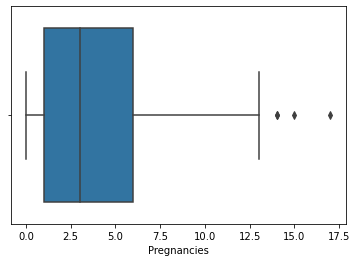

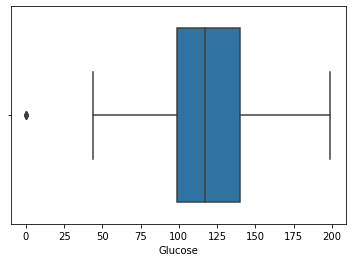

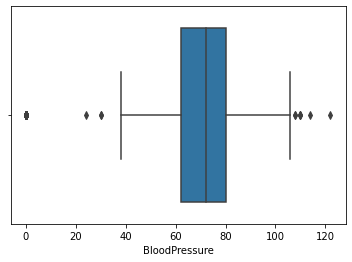

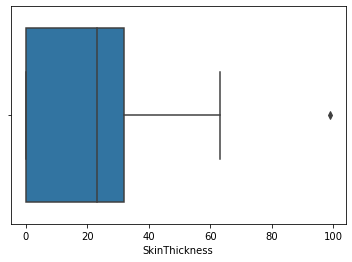

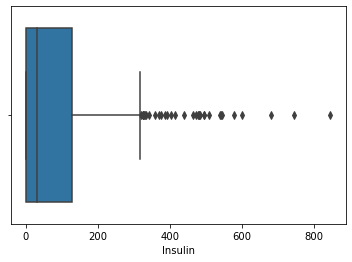

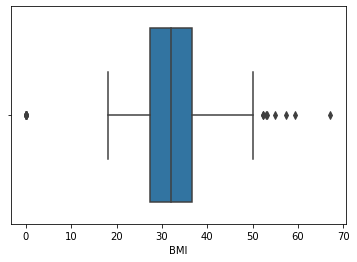

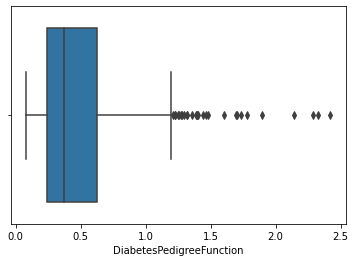

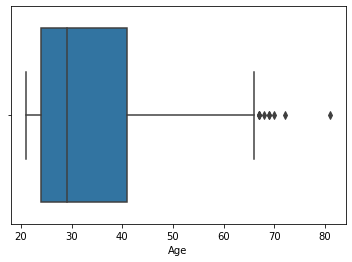

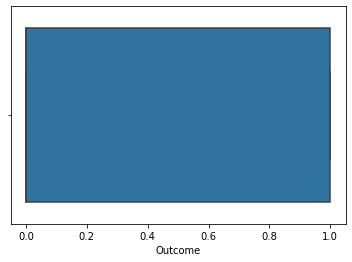

In [9]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for i in col:
    sns.boxplot(df[i])
    plt.show()

### Hard capping

In [10]:
def n_col(num):
    plt.figure(figsize=(6,6))
    plt.title(num)
    sns.boxplot(df[num])
    plt.show()
    return

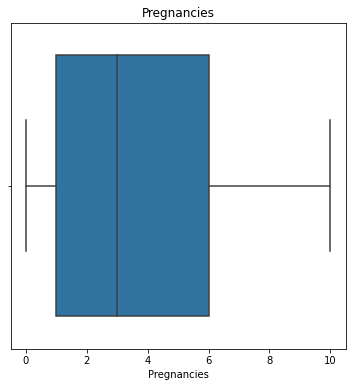

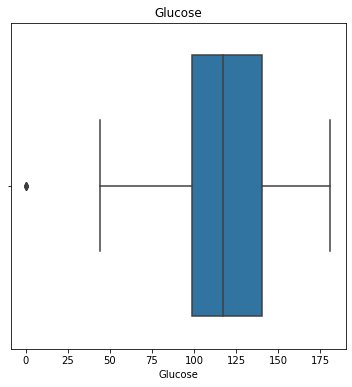

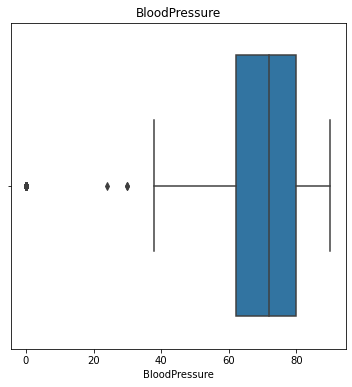

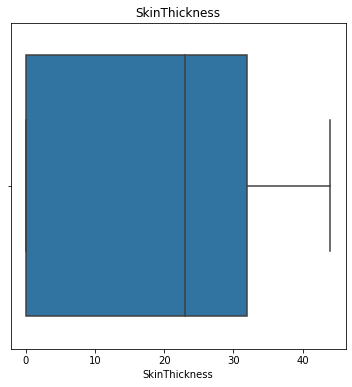

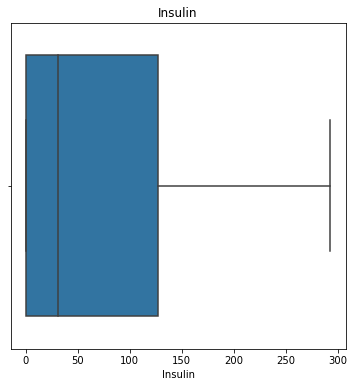

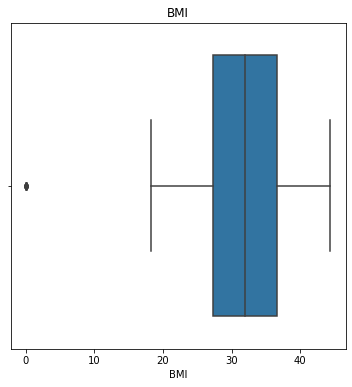

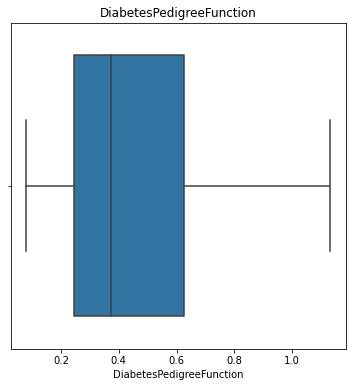

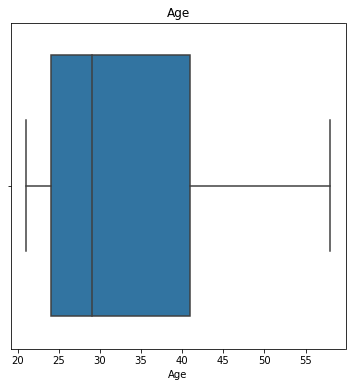

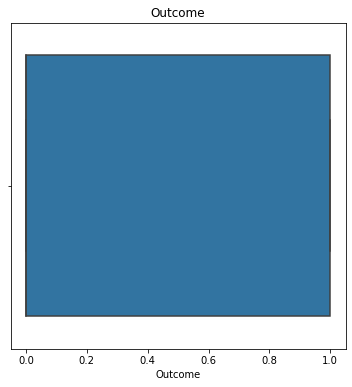

In [11]:
for num in col:
    q3,q1 = np.percentile(df[num],[75,25])
    q4 = np.percentile(df[num],[95])
    df.loc[df[num] > q4[0], num] = q4[0]
    n_col(num)

In [12]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.62700,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.35100,31.0,0.0
2,8.0,181.0,64.0,0.0,0.0,23.3,0.67200,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.13285,33.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.20100,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.24800,26.0,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.13400,29.0,0.0
8,2.0,181.0,70.0,44.0,293.0,30.5,0.15800,53.0,1.0
9,8.0,125.0,90.0,0.0,0.0,0.0,0.23200,54.0,1.0


## step: 4--data analysis

### 1 - univariat analysis:

In [13]:
un = list(df.describe().columns)
un

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

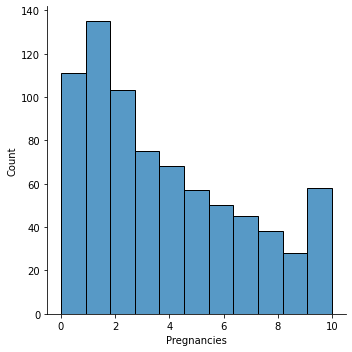

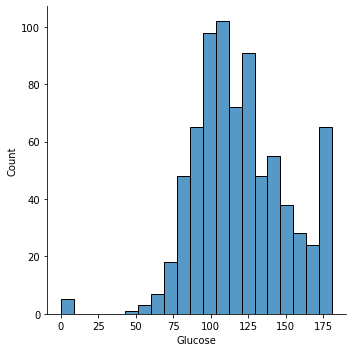

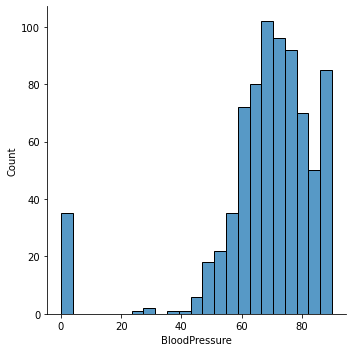

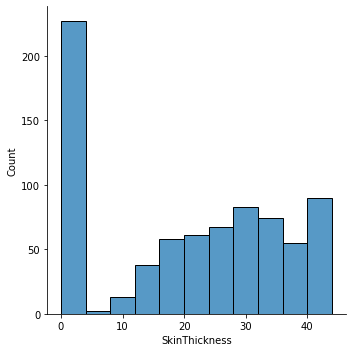

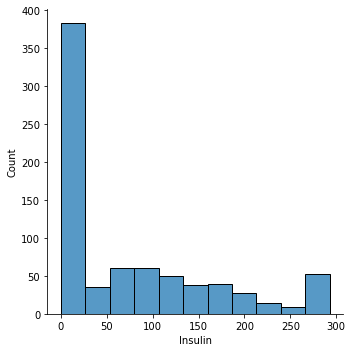

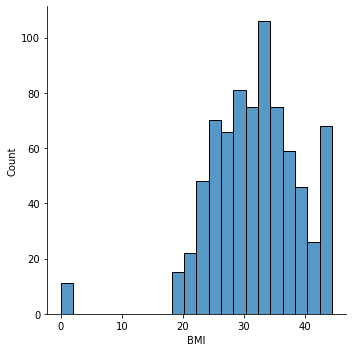

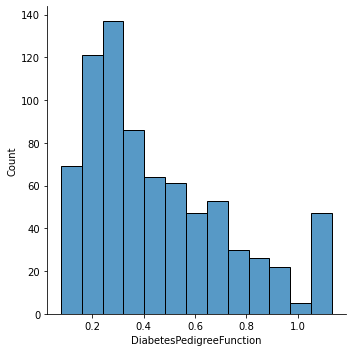

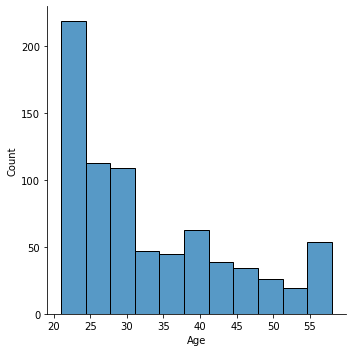

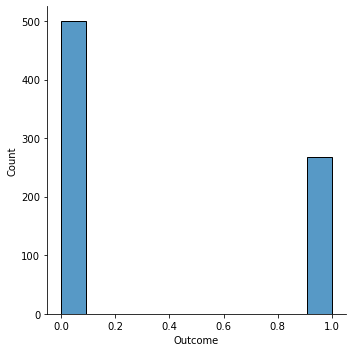

In [14]:
for i in un:
    sns.displot(df[i])
    plt.show()

### 2 - bivariat analysis:

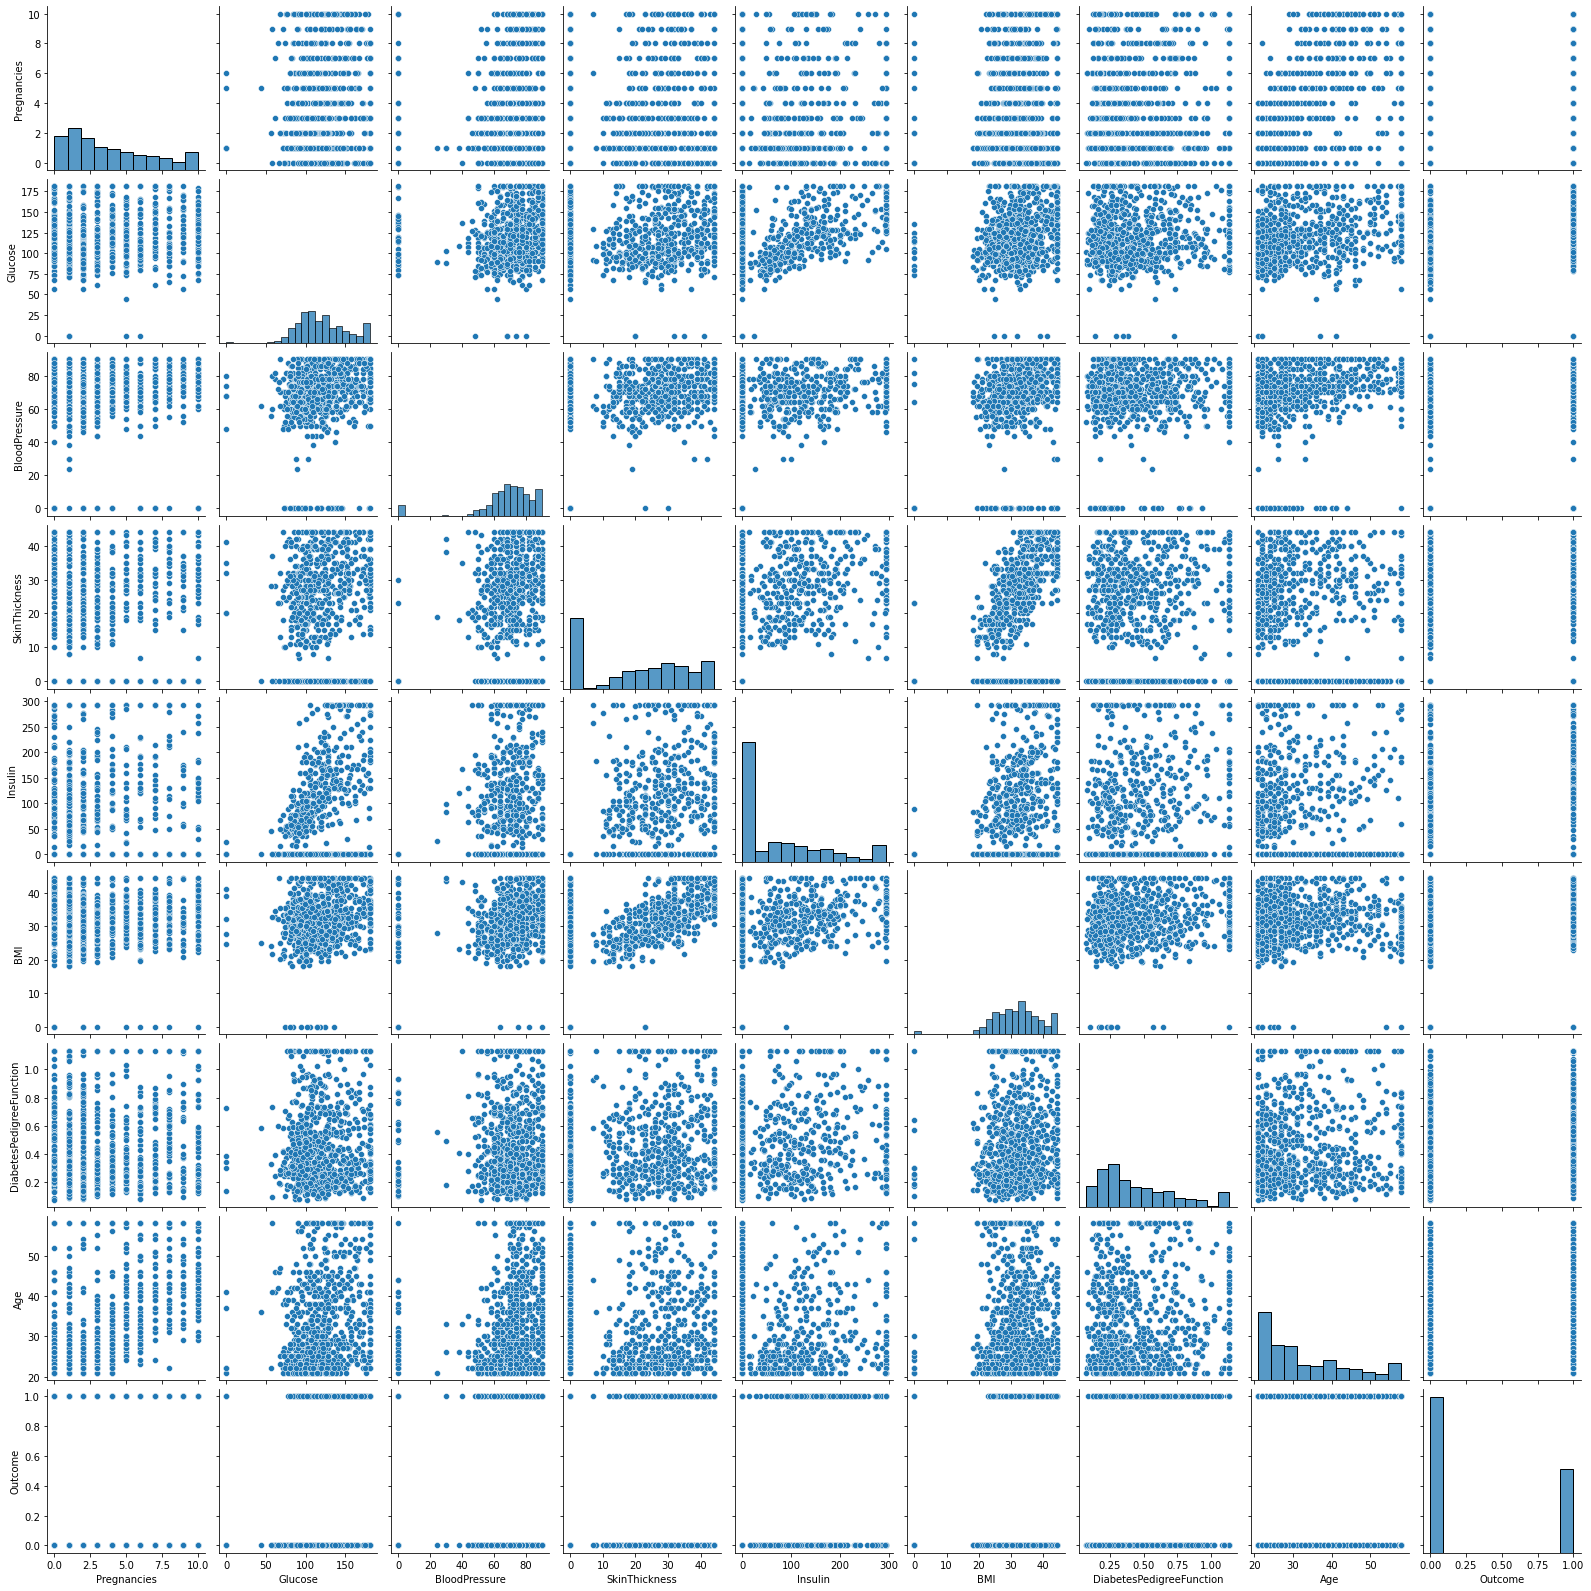

In [15]:

sns.pairplot(df)

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

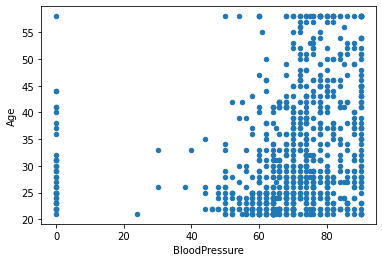

In [16]:
df.plot.scatter('BloodPressure','Age')

## observation:

--as age increases bloodpressure increases 


<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

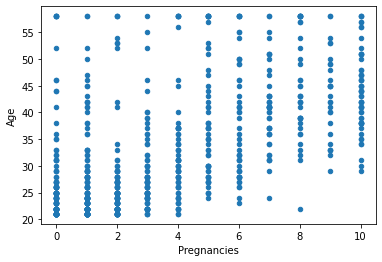

In [44]:
df.plot.scatter('Pregnancies','Age')

## observation:

--with increasing of age number of pregnancies also increases but only with personal choices

<AxesSubplot:xlabel='SkinThickness', ylabel='Age'>

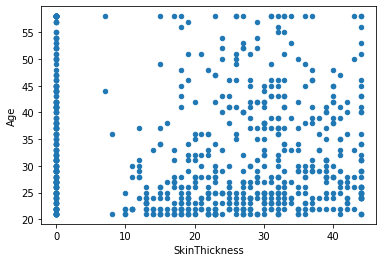

In [46]:
df.plot.scatter('SkinThickness','Age')

### 3 - multivariat analysis:

In [25]:
h_map = df.corr()
h_map

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.133322,0.140490,-0.089856,-0.084848,0.015494,-0.017851,0.580956,0.219720
Glucose,0.133322,1.000000,0.149125,0.043389,0.310144,0.223910,0.114463,0.267226,0.466443
BloodPressure,0.140490,0.149125,1.000000,0.220201,0.112528,0.279586,0.054182,0.243244,0.058576
SkinThickness,-0.089856,0.043389,0.220201,1.000000,0.507545,0.387504,0.173330,-0.118945,0.067962
Insulin,-0.084848,0.310144,0.112528,0.507545,1.000000,0.214651,0.196001,-0.059339,0.122785
BMI,0.015494,0.223910,0.279586,0.387504,0.214651,1.000000,0.139386,0.065463,0.287865
DiabetesPedigreeFunction,-0.017851,0.114463,0.054182,0.173330,0.196001,0.139386,1.000000,0.051201,0.184394
Age,0.580956,0.267226,0.243244,-0.118945,-0.059339,0.065463,0.051201,1.000000,0.260498
Outcome,0.219720,0.466443,0.058576,0.067962,0.122785,0.287865,0.184394,0.260498,1.000000


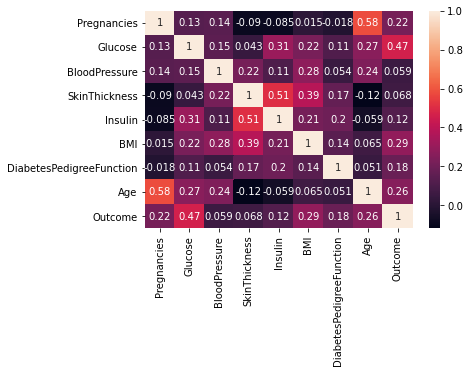

In [24]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## step: 5 - Data Preparation:

In [26]:
## splitting the data:

x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [27]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.62700,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.35100,31.0
2,8.0,181.0,64.0,0.0,0.0,23.3,0.67200,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.13285,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,44.0,180.0,32.9,0.17100,58.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.34000,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.24500,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.34900,47.0


In [28]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [29]:
# 2 - train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [30]:
x_train.shape

(537, 8)

In [32]:
x_test.shape

(231, 8)

In [31]:
# 3 - scaling:

from sklearn.preprocessing import MinMaxScaler

m_scale = MinMaxScaler()

In [33]:
m_scale.fit_transform(x_train)

array([[0.1       , 0.52486188, 0.66666667, ..., 0.53834891, 0.17253638,
        0.02702703],
       [0.5       , 0.5801105 , 0.8       , ..., 0.83117468, 0.07678817,
        0.18918919],
       [0.        , 0.74585635, 0.75555556, ..., 0.95281   , 0.2720766 ,
        0.08108108],
       ...,
       [1.        , 0.55801105, 0.95555556, ..., 1.        , 1.        ,
        0.45945946],
       [0.        , 0.77900552, 0.        , ..., 0.95506251, 0.12039626,
        0.21621622],
       [0.        , 0.69060773, 1.        , ..., 0.50681383, 0.17443238,
        0.        ]])

In [34]:
m_scale.transform(x_test)

array([[0.6       , 0.54143646, 0.64444444, ..., 0.76585201, 0.33369673,
        0.59459459],
       [0.2       , 0.61878453, 0.83333333, ..., 0.80414461, 0.06636015,
        0.        ],
       [0.2       , 0.59668508, 0.71111111, ..., 0.69377182, 0.07584017,
        0.        ],
       ...,
       [0.        , 0.70165746, 0.88888889, ..., 0.81765965, 0.68824951,
        0.05405405],
       [0.6       , 0.5801105 , 0.77777778, ..., 0.69377182, 0.04171209,
        0.43243243],
       [0.5       , 0.42541436, 0.91111111, ..., 0.80639712, 0.07394416,
        0.37837838]])

## step: 6-- Fit The Model:

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

LogisticRegression()

## step: 7--Predict The Model:

In [36]:
y_pred = lr_model.predict(x_test)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [37]:
## confusion mattrix:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[119,  32],
       [ 29,  51]], dtype=int64)

## step: 8--evaluate the model:

In [38]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
score

0.7359307359307359

In [39]:
from sklearn.metrics import recall_score

score1 = recall_score(y_test,y_pred)
score1

0.6375

In [40]:
from sklearn.metrics import precision_score

score2 = precision_score(y_test,y_pred)
score2

0.6144578313253012

In [41]:
## sensitivity and specificity:

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
sensitivity = TP/(FN+TP)
sensitivity

0.6375

In [43]:
specificity = TN/(TN+FP)
specificity

0.7880794701986755